In [1]:
num=[2,7,11,-2]
target=9
 
for i in range(len(num)):
    for j in range(i+1,len(num)):
        if num[i]+num[j]==target:
            print (num[i],num[j])

2 7
11 -2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('mlr06.xls')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [207]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [5]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
X2,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
X3,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
X4,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
X5,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
X6,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
X7,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


In [6]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

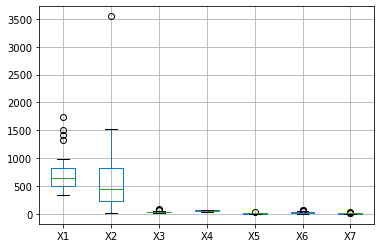

In [9]:
box_plot=df.boxplot()

In [36]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7
count,50.000000,49.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,717.960000,556.408163,37.760000,58.800000,15.400000,29.900000,13.820000
std,293.938766,392.019553,13.820364,9.965246,6.023762,14.801062,5.157479
min,341.000000,29.000000,16.000000,42.000000,4.000000,7.000000,8.000000
25%,497.000000,226.000000,30.000000,49.000000,11.000000,21.250000,11.000000
50%,654.500000,451.000000,34.500000,59.000000,14.000000,25.000000,12.000000
75%,820.500000,809.000000,42.250000,67.000000,19.000000,34.250000,15.750000
max,1740.000000,1517.000000,86.000000,81.000000,34.000000,81.000000,36.000000


In [21]:
df.shape

(50, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139B6ACBD48>,
      dtype=object)

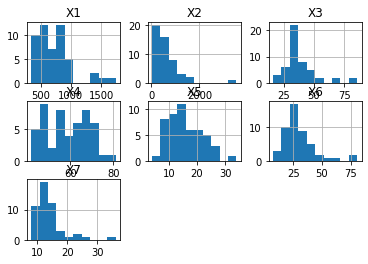

In [22]:
df.hist()

In [115]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X1    300.25
X2    552.50
X3      5.75
X4     18.00
X5      8.00
X6      9.50
X7      3.75
dtype: float64


In [116]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

       X1     X2     X3     X4     X5     X6     X7
0   False  False  False  False  False  False  False
1   False  False  False  False  False  False  False
2   False  False  False  False  False  False  False
3   False  False  False  False  False  False  False
4   False  False  False  False  False  False  False
5   False  False  False  False  False  False  False
6   False  False  False  False  False  False  False
7   False  False  False  False  False  False  False
8   False  False  False  False  False  False  False
9   False  False  False  False  False  False  False
10  False  False  False  False  False  False  False
11  False  False  False  False  False  False  False
12  False  False  False  False  False  False  False
13  False  False  False  False  False  False  False
14  False  False  False  False  False  False  False
15  False  False  False  False  False  False  False
16  False  False  False  False  False  False  False
17  False  False  False  False  False  False  False
18  False  F

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [117]:
 df=df[~((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))]

In [121]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

In [119]:
df.fillna(df.median(),inplace=True)

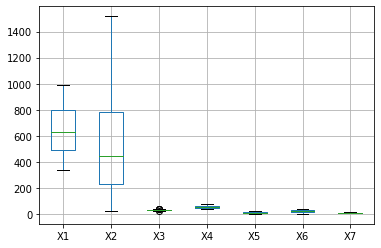

In [123]:
df.boxplot()

In [122]:
df.X3[39]

30.0

In [153]:
df1=df.drop(['X1'],axis=1)
df2=df['X1']

In [159]:
df['X2'].head()

0    184.0
1    213.0
2    347.0
3    565.0
4    327.0
Name: X2, dtype: float64

In [160]:
from sklearn.model_selection import train_test_split


In [197]:
x=df[['X2']]
y=df['X1']

In [198]:
y.head()

0    478.0
1    494.0
2    643.0
3    341.0
4    773.0
Name: X1, dtype: float64

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(40, 1) (40,)
(10, 1) (10,)


In [200]:
X_train

,X2
15,245.0
23,697.0
4,327.0
5,260.0
29,216.0
37,631.0
13,809.0
40,451.0
18,387.0
44,601.0


In [201]:
from sklearn import  linear_model


In [202]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [203]:
predictions

array([662.73070385, 597.98609711, 519.10186362, 541.17952645,
       717.05663824, 794.45248997, 521.33443626, 592.52869731,
       764.18872743, 765.92517282])

In [204]:
model.score(X_test, y_test)

0.7756655882558782

In [206]:
x=sm.add_constant(df1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     X1   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     5.705
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           0.000198
Time:                        18:21:15   Log-Likelihood:                -314.07
No. Observations:                  50   AIC:                             642.1
Df Residuals:                      43   BIC:                             655.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        696.3098    277.346      2.511      0.016     136.989    1255.631
X2             0.2624      0.057      4.585      0.000       0.147       0.378
X3            -0.2080      4.204     -0.049      0.961      -8.686       8.270
X4            -0.5118      3.128     -0.164      0.871      -6.821       5.797
X5             1.8307      5.058      0.362      0.719      -8.371      12.032
X6            -1.5460      3.282     -0.471      0.640      -8.165       5.073
X7           -11.4129      9.383     -1.216      0.231     -30.336       7.511
==============================================================================
Omnibus:                        1.482   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                1.082
Skew:                           0.028   Prob(JB):                        0.582
Kurtosis:                       2.281   Cond. No.                     9.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
import re
import string

def countWords(data_frame, selected_words):
    words_dict = {}

    for sentence in data_frame:
        remove = string.punctuation
        remove = remove.replace("'", "") # don't remove hyphens
        pattern = r"[{}]".format(remove) # create the pattern

        test = re.sub(pattern, "", str(sentence)) #compile

        splited_words = str(test).split(' ')

        for word in splited_words:
            word = word.strip()
            word = word.lower()
            if word in selected_words:
                if word not in words_dict:
                    words_dict[word] = 1
                else:
                    words_dict[word] += 1
    return words_dict

In [28]:
selected_words = ['Cloth', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate'] 
df = 'These flannel wipes are OK, but in my opinion not worth keeping. I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality. I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.'

In [26]:
countWords(data_frame,selected_words)

{}

In [29]:
words = df.sentences.str.split(expand=True).stack()
words = words[words.isin(selected_words)]
return words.value_counts()

AttributeError: 'str' object has no attribute 'sentences'